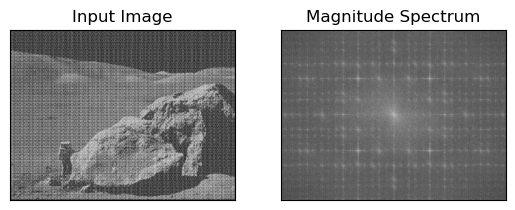

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
#Filter creating
# Low pass filter
mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask[centerX-50:centerX+50, centerY - 50:centerY+50,:] = 1

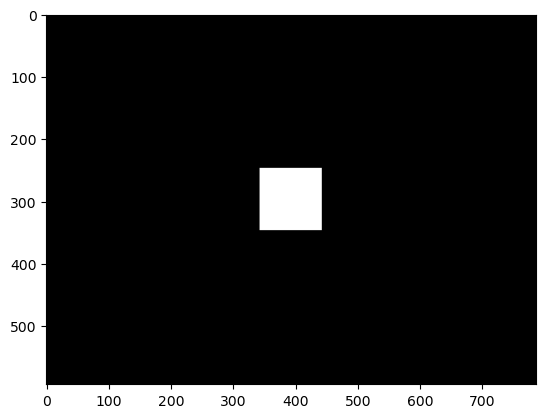

In [3]:
plt.imshow(mask[:,:,0], cmap = 'gray')

In [4]:
# Filtering
dft_shift = dft_shift*mask

C:\Users\User\AppData\Local\Temp\ipykernel_9960\3830399572.py:1: RuntimeWarning: divide by zero encountered in log
  filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


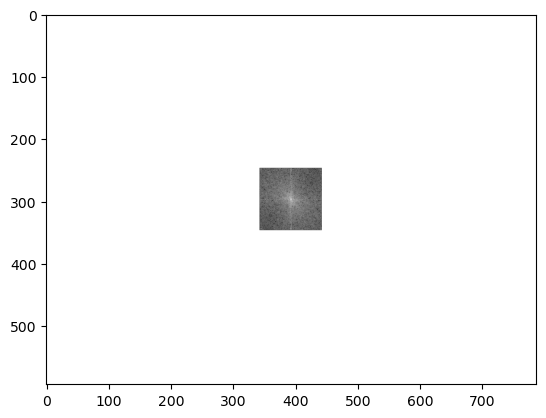

In [5]:
filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

In [6]:
#fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

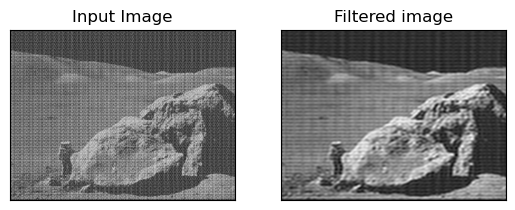

In [7]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

 Реализуйте высокочастотную фильтрацию на основе ядра Гаусса

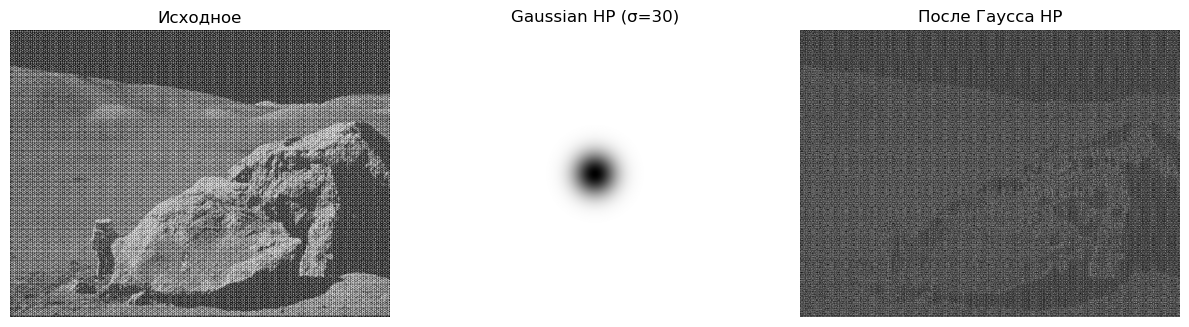

In [13]:
image = cv.imread('periodic_kernel.jpg', cv.IMREAD_GRAYSCALE)
if image is None:
    image = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError("Изображение не найдено!")

rows, cols = image.shape

# Гауссов высокочастотный фильтр 
def create_gaussian_highpass_filter(shape, sigma):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    gauss_low = np.exp(-((x - center_col)**2 + (y - center_row)**2) / (2 * sigma**2))
    return 1 - gauss_low

sigma = 30
gaussian_hp = create_gaussian_highpass_filter((rows, cols), sigma)

dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# применяем высокочастотную маску
dft_filtered = dft_shift * gaussian_hp[:, :, np.newaxis]

dft_unshift = np.fft.ifftshift(dft_filtered)
img_back = cv.idft(dft_unshift)
img_hp = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# визуализация гаусса
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_hp, cmap='gray')
plt.title(f'Gaussian HP (σ={sigma})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_hp, cmap='gray')
plt.title('После Гаусса HP')
plt.axis('off')
plt.tight_layout()
plt.show()


Реализуйте удаление периодического шума

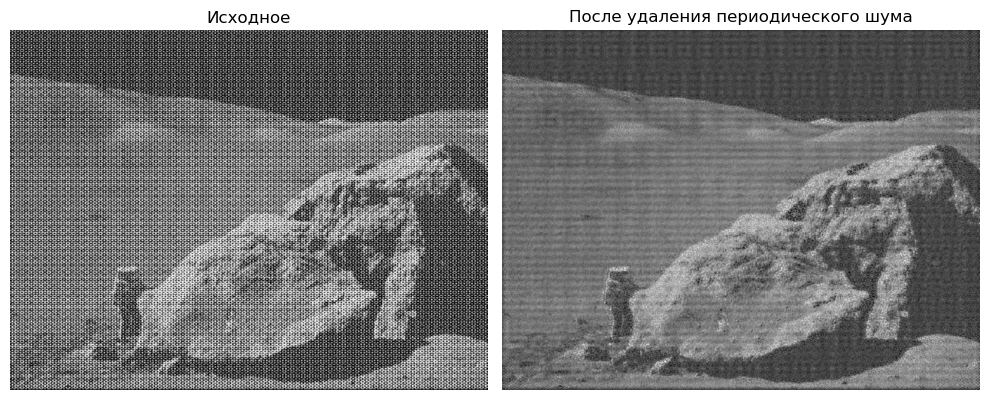

In [15]:
# спектр
magnitude = cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
log_magnitude = 20 * np.log(magnitude + 1e-8)

percentile = 96
threshold = np.percentile(log_magnitude, percentile)
noise_mask = log_magnitude > threshold


center_radius_ratio = 0.1
center_radius = int(min(rows, cols) * center_radius_ratio)
center_y, center_x = rows // 2, cols // 2

filter_mask = np.ones((rows, cols, 2), dtype=np.float32)
for y in range(rows):
    for x in range(cols):
        if noise_mask[y, x]:
            dist = np.sqrt((x - center_x)**2 + (y - center_y)**2)
            if dist > center_radius:
                filter_mask[y, x] = 0
                filter_mask[rows - y - 1, cols - x - 1] = 0

# применяем маску
dft_denoised = dft_shift * filter_mask
dft_unshift_denoised = np.fft.ifftshift(dft_denoised)
img_denoised_complex = cv.idft(dft_unshift_denoised)
img_denoised = cv.magnitude(img_denoised_complex[:, :, 0], img_denoised_complex[:, :, 1])

# нормализация
img_denoised_norm = cv.normalize(img_denoised, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoised_norm, cmap='gray')
plt.title('После удаления периодического шума')
plt.axis('off')
plt.tight_layout()
plt.show()